In [7]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas as pd
from itertools import chain

In [8]:
df = pd.read_excel('carte.xlsx')
df

,Region,Lat,Long,case,death_case,Population
0,Androy,-24.750000,45.500000,12,0,476600
1,Anôsy,-25.033333,46.983329,95,0,809313
2,Atsimo_Andrefana,-23.350000,43.666670,173,3,1799000
3,Ihorombe,-22.402930,46.125760,16,2,418520
4,Menabe,-20.284166,44.317165,66,0,390800
5,Analanjirofo,-17.166666,49.299999,106,0,1035132
6,Diana,-12.266666,49.283332,273,14,680000
7,Sava,-14.883330,50.283332,95,2,1123000
8,Sofia,-14.872398,47.983399,145,1,985000
9,Boeny,-15.716670,46.316670,386,6,931171


In [3]:
# Set the dimension of the figure
plt.rcParams["figure.figsize"]=15,10;

# Make the background map
m=Basemap(llcrnrlat=-28, urcrnrlat=-10,llcrnrlon=40, urcrnrlon=55);
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.2)
m.drawcoastlines(linewidth=0.1, color="white")

m.scatter(
    x=df['Long'].values, 
    y=df['Lat'].values, 
    s=df['case'].values/5, 
    alpha=0.8, 
    c=df['death_case'].values, 
    cmap="viridis"
)
plt.colorbar(label='Mort')
plt.clim(0, 125)
for a in [20,100, 200, 2000]:
    plt.scatter([], [], c='k', alpha=0.3, s=a,
    label=str(a*5))
    plt.legend(scatterpoints=1, frameon=False,
    labelspacing=1, loc='lower left');
    
for i, row in df.iterrows():
    plt.annotate(row.Region, xy=m(row.Long+0.1, row.Lat), verticalalignment='center')


#plt.savefig("carte.jpg",dpi=500)
#plt.savefig("carte.pdf")

NameError: name 'Basemap' is not defined

In [1]:
import geopandas as gpd
import geoplot as gplt
#import geoviews as gv
#import geoviews.feature as gf
import xarray as xr
from cartopy import crs
import mapclassify as mc

In [3]:
sf = gpd.read_file('features.json')

In [9]:
scheme = mc.Quantiles(df['case'], k=10)
scheme1 = mc.Quantiles(df['Population'], k=10)
region = [0,0,1,0,0,0,2,0,0,3,0,0,4,0,0,0,5,0,0,0,6,0]
regions = mc.Quantiles(region, k=22)
regions

/home/tsilefa/anaconda3/lib/python3.10/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 22 classes. Setting k to 8.
  warnings.warn(


Quantiles

  Interval     Count
--------------------
[0.00, 0.00] |    16
(0.00, 0.27] |     0
(0.27, 1.23] |     1
(1.23, 2.18] |     1
(2.18, 3.14] |     1
(3.14, 4.09] |     1
(4.09, 5.05] |     1
(5.05, 6.00] |     1

/home/tsilefa/anaconda3/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Figure size 1600x1900 with 0 Axes>

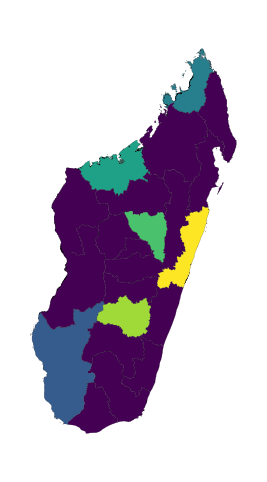

In [10]:
plt.figure(figsize=(16,19))
gplt.choropleth(sf, 
    hue=region, 
    linewidth=.1,
    scheme=regions, cmap='viridis',
    edgecolor='black'
)
plt.savefig("province.jpg",dpi=500)

/home/tsilefa/anaconda3/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


Text(0.5, 1.0, 'Population per area')

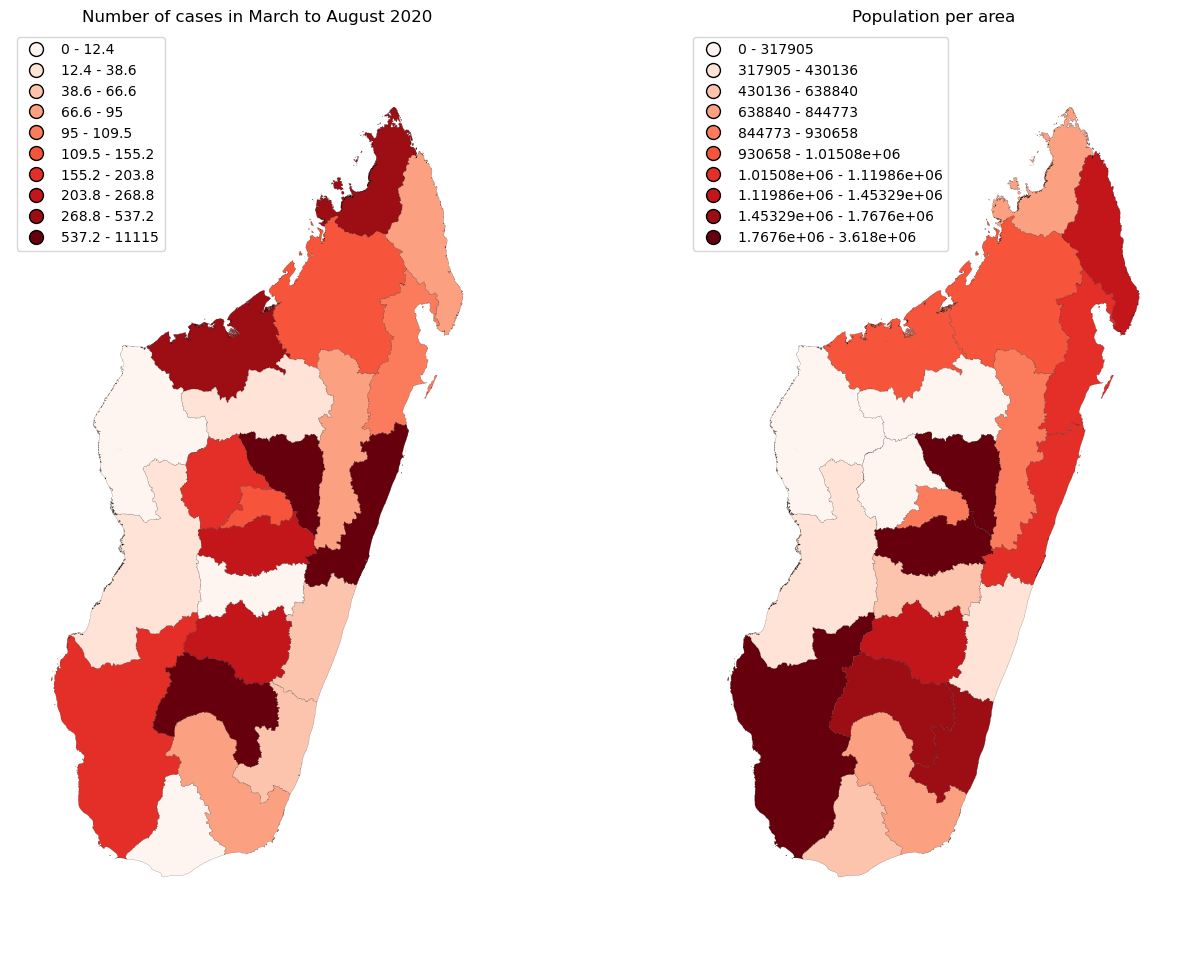

In [12]:
fig,(ax1,ax2), = plt.subplots(1,2, figsize=(16, 12))
gplt.choropleth(sf, 
    hue=df['case'], 
    linewidth=.1,
    scheme=scheme, cmap='Reds',
    legend=True,
    edgecolor='black',
    ax=ax1
)
ax1.set_title('Number of cases in March to August 2020')
#plt.savefig("choro_covid.jpg",dpi=500)
#plt.savefig("choro_covid.pdf")
#fig,ax1, = plt.subplots(1, figsize=(16, 12))
gplt.choropleth(sf, 
    hue=df['Population'], 
    linewidth=.1,
    scheme=scheme1, cmap='Reds',
    legend=True,
    edgecolor='black',
    ax=ax2
)
ax2.set_title('Population per area')
#plt.savefig("choro.jpg",dpi=500)
#plt.savefig("choro.pdf")

In [11]:
data = pd.read_csv('per_week.csv')
c = np.array(data.iloc[:,3:])
data

,Lat,Long,Region,31/03/20,07/04/20,15/04/20,22/04/20,30/04/20,07/05/20,15/05/20,...,22/06/20,30/06/20,07/07/20,15/07/20,22/07/20,31/07/30,07/08/20,15/08/20,22/08/20,30/08/20
0,"-21,50216466","45,20566584",Androy,1,1,1,1,1,1,1,...,1,1,1,1,1,3,1,3,1,3
1,"-25,0333332","46,9833294",Anôsy,1,1,1,1,2,1,1,...,1,1,1,1,3,3,3,3,2,2
2,"-23,35","43,66667",Atsimo_Andrefana,1,2,1,1,2,1,1,...,1,1,1,3,3,3,3,3,2,3
3,"-22,40293","46,12576",Ihorombe,1,1,1,1,1,1,1,...,1,1,1,2,1,2,3,1,3,3
4,"-20,28416553","44,31716538",Menabe,1,1,1,1,1,1,1,...,1,1,2,1,2,1,3,3,3,3
5,"-17,166666","49,2999988",Analanjirofo,1,1,2,1,1,1,1,...,3,3,2,3,3,3,2,1,1,1
6,"-12,2666656","49,2833322",Diana,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,3,3,3
7,"-14,8833298","50,2833322",Sava,1,1,1,1,1,1,1,...,1,2,1,2,1,3,3,3,3,3
8,"-14,87239818","47,9833994",Sofia,1,1,1,1,1,1,1,...,1,1,1,2,2,3,3,3,3,3
9,"-15,71667","46,31667",Boeny,1,1,1,1,1,1,1,...,1,2,2,2,3,3,3,3,2,2


In [12]:
scheme1 = mc.Quantiles(np.array([1,2,3]),k=3)
scheme1

Quantiles

  Interval     Count
--------------------
[1.00, 1.67] |     1
(1.67, 2.33] |     1
(2.33, 3.00] |     1

/home/tsilefa/anaconda3/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


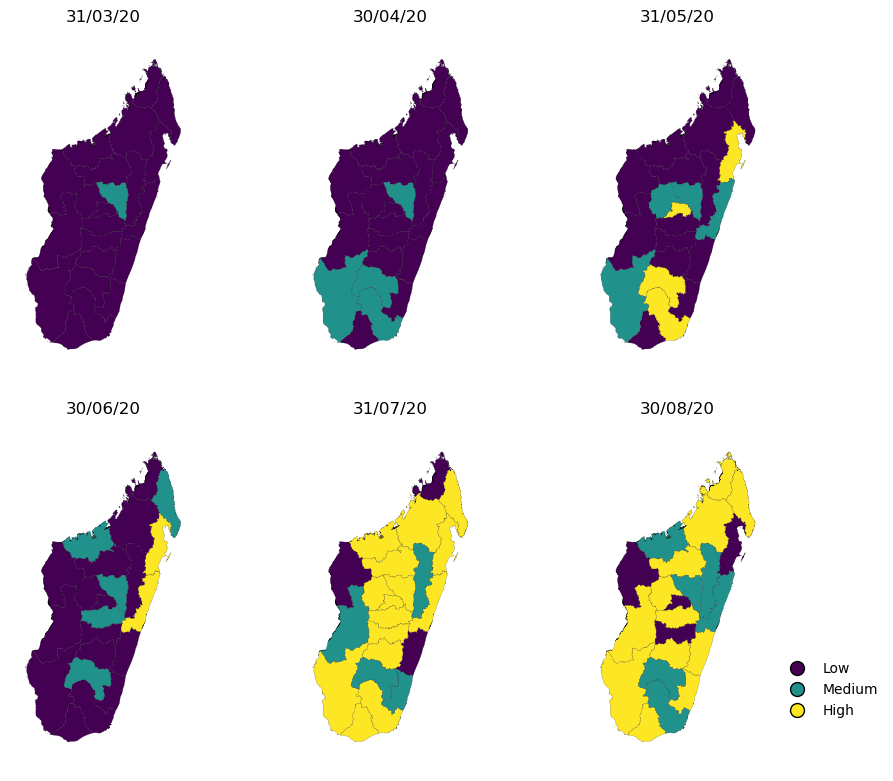

In [13]:
fig,(axs), = plt.subplots(2,3,figsize=(11,8))
fig.tight_layout(w_pad=-15)
gplt.choropleth(sf, 
    hue=data['31/03/20'], 
    linewidth=.1,
    scheme=scheme1, cmap='viridis',
    legend=False,
    edgecolor='black',
    ax=axs[0,0]
)
axs[0,0].set_title("31/03/20")
gplt.choropleth(sf, 
    hue=data['30/04/20'], 
    linewidth=.1,
    scheme=scheme1, cmap='viridis',
    legend=False,
    edgecolor='black',
    ax=axs[0,1]
)
axs[0,1].set_title('30/04/20')
gplt.choropleth(sf, 
    hue=data['31/05/20'], 
    linewidth=.1,
    scheme=scheme1, cmap='viridis',
    legend=False,
    edgecolor='black',
    ax=axs[0,2]
)
axs[0,2].set_title('31/05/20')
gplt.choropleth(sf, 
    hue=data['30/06/20'], 
    linewidth=.1,
    scheme=scheme1, cmap='viridis',
    legend=False,
    edgecolor='black',
    ax=axs[1,0]
)
axs[1,0].set_title('30/06/20')
gplt.choropleth(sf, 
    hue=data['31/07/30'], 
    linewidth=.1,
    scheme=scheme1, cmap='viridis',
    legend=False,
    edgecolor='black',
    ax=axs[1,1]
)
axs[1,1].set_title('31/07/20')
gplt.choropleth(sf, 
    hue=data['30/08/20'], 
    linewidth=.1,
    scheme=scheme1, cmap='viridis',
    legend=True,legend_labels=["Low","Medium", "High"],
    legend_kwargs={'bbox_to_anchor': (1, 0.35), 'frameon': False},
    edgecolor='black',
    ax=axs[1,2]
)
axs[1,2].set_title('30/08/20')
plt.savefig('spatio_temporel.jpg',dpi=500)